In [2]:
class DelayObject:
    def __init__(self, width, radix, name, range_="", toggle=None):
        self.width = width
        self.radix = radix
        self.name = name
        self.range_ = range_
        self.toggle = toggle if toggle is not None else {}
    def getObject(self):
        print(dict(width=self.width, radix=self.radix, name=self.name, range_=self.range_))

In [3]:
f= open("ExampleRocketSystem_rando_sampleOutput.v","r")
line=f.readline().rstrip("\n")
while line[:4]!="$var":
    line=f.readline().rstrip("\n")

In [4]:
a = True
objectdict={}
try:
    while a:
        l1 = line.split()
        range_ = ""
        if len(l1) >= 6:
            if l1[5] != "$end":
                range_ = l1[5]
            obj = DelayObject(l1[2], l1[3], l1[4], range_)  
            objectdict[obj.radix]=obj
        if line == "$upscope $end":
            print("End Of File")
            a = False
        line = f.readline().rstrip("\n")  
except KeyboardInterrupt:
    print("Program interrupted by the user")
print(objectdict)

End Of File
{'!': <__main__.DelayObject object at 0x7ff190ba24c0>, '"': <__main__.DelayObject object at 0x7ff1b0ae09d0>, '#': <__main__.DelayObject object at 0x7ff1b0ae0dc0>, '$': <__main__.DelayObject object at 0x7ff1b0ae0ee0>, '%': <__main__.DelayObject object at 0x7ff188018160>, ';%&': <__main__.DelayObject object at 0x7ff188018670>, '<%&': <__main__.DelayObject object at 0x7ff188018760>, ',': <__main__.DelayObject object at 0x7ff188018e20>, '-': <__main__.DelayObject object at 0x7ff188018520>, '=%&': <__main__.DelayObject object at 0x7ff1880185e0>, '>%&': <__main__.DelayObject object at 0x7ff188018580>, '?%&': <__main__.DelayObject object at 0x7ff1b08481c0>, 'T': <__main__.DelayObject object at 0x7ff1b0a84a90>, 'U': <__main__.DelayObject object at 0x7ff190bbdfa0>, '@%&': <__main__.DelayObject object at 0x7ff1b0a840d0>, 'A%&': <__main__.DelayObject object at 0x7ff1b0a91dc0>, 'B%&': <__main__.DelayObject object at 0x7ff1b0a91a00>, 'C%&': <__main__.DelayObject object at 0x7ff1b0a91c40

In [5]:
while line != "$dumpvars":
    line=f.readline().rstrip("\n")
while line != "$end":
    line=f.readline().rstrip("\n")

In [6]:
line = f.readline().rstrip("\n")
#time of switching // current time
time = ""

while line != "":
    #check if the current line contains the time
    if line[0] == "#":
    #read the time of format: "#<time>"
        time = line[1:]
    #checking of the signal is binary?
    elif line[0] == "b" or line[0] == "B":
    #splitting the string containing signal value and the identifier
        l1 = line.split()
        binary_value = l1[0][1:]  
    #storing the time in the dictionary with time as key and value 0 or 1 as the value
        objectdict[l1[-1]].toggle[time] = binary_value
    else:
    #else just store the value as 0th index of a line and the remaining string as the radix(identifier)
        objectdict[line[1:]].toggle[time] = line[0]
    line = f.readline().rstrip("\n")
# Objectdict structure is as follow:
#objectdict: type: dict
#<key> : Radix, <value>: delay object/ object of class DelayObject

In [7]:
print(len(objectdict["<+&"].toggle))

14353


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


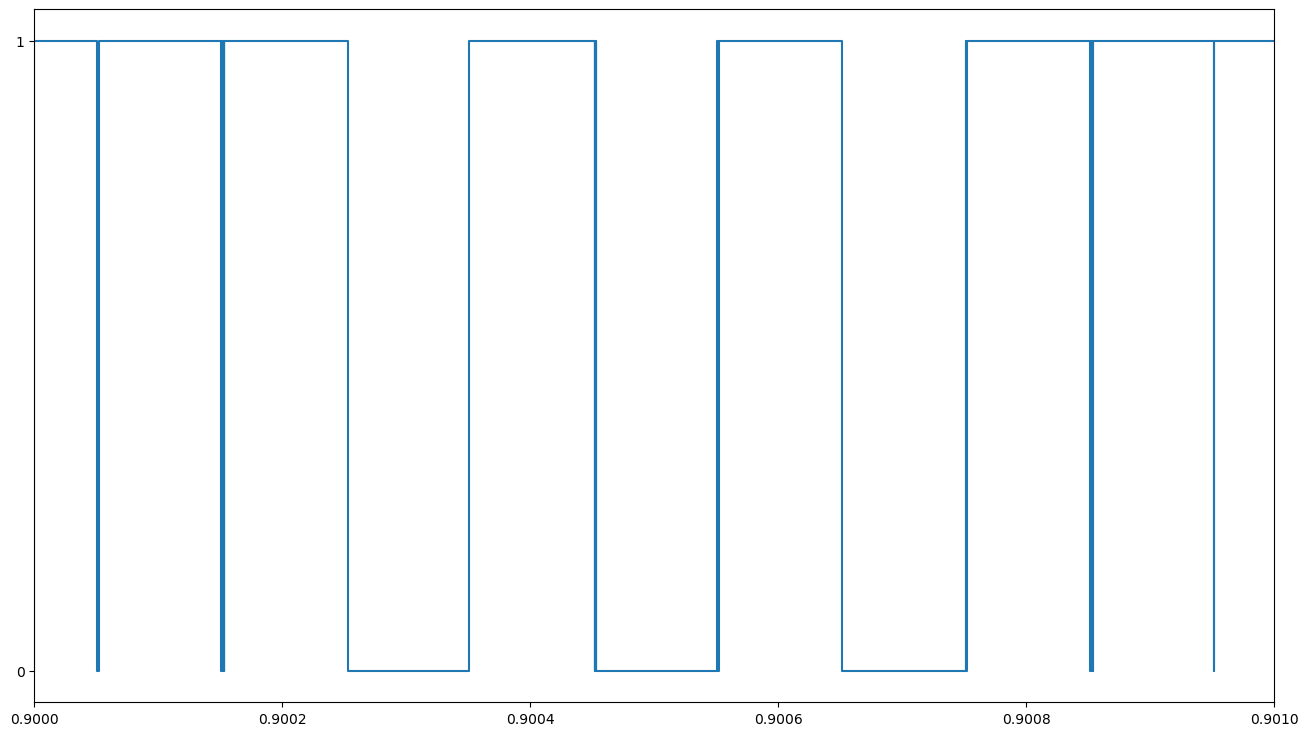

In [8]:
import numpy as np
from matplotlib import pyplot as plt

y = objectdict["ZK$"].toggle.values()

x = [float(z) * 1e-8 for z in objectdict["ZK$"].toggle.keys()]

plt.figure(figsize=(16, 9))

plt.step(x, y, where='pre')

plt.xlim(0.9, 0.901)
plt.savefig('sample.pdf')
plt.show()


In [9]:
print(len(objectdict))

39137


In [10]:
import pickle

# Assuming objectdict is defined and populated in parsingfile.ipynb
with open('objectdict.pickle', 'wb') as f:
    pickle.dump(objectdict, f)


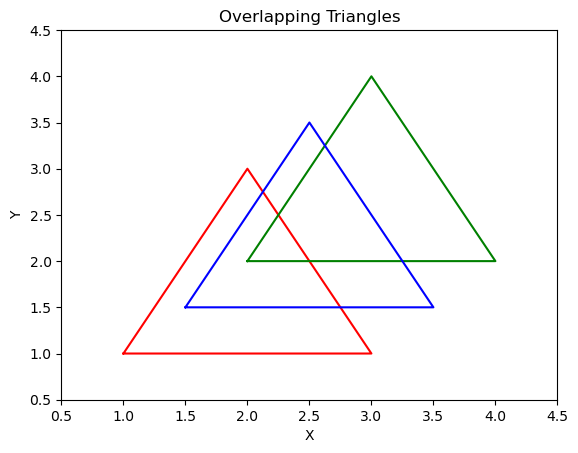

In [11]:
import matplotlib.pyplot as plt

def plot_overlapping_triangles():
    fig, ax = plt.subplots()
    
    # Triangle 1
    ax.plot([1, 2, 3, 1], [1, 3, 1, 1], 'r-')
    
    # Triangle 2
    ax.plot([2, 3, 4, 2], [2, 4, 2, 2], 'g-')
    
    # Triangle 3
    ax.plot([1.5, 2.5, 3.5, 1.5], [1.5, 3.5, 1.5, 1.5], 'b-')
    
    # Set the x-axis and y-axis limits
    ax.set_xlim(0.5, 4.5)
    ax.set_ylim(0.5, 4.5)
    
    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Overlapping Triangles')
    
    # Display the plot
    plt.show()

# Call the function to plot overlapping triangles
plot_overlapping_triangles()


In [12]:
def find_string_in_file(file_path, search_string):
    try:
        with open(file_path, 'r') as file:
            for line_number, line in enumerate(file, start=1):
                if search_string in line:
                    return  
            print(search_string)
    except FileNotFoundError:
        print("File not found.")

if __name__ == "__main__":
    file_path = "ExampleRocketSystem_GEN.gv"
    for x in objectdict:
        find_string_in_file(file_path, objectdict[x].name)
#wire in outputfile but not in .v file

KeyboardInterrupt: 

In [13]:
l1 = len(objectdict[">!#"].toggle)
print(objectdict[">!#"].name)

clint_ICCADs_n58


In [14]:
l2 = len(objectdict["A!#"].toggle)
print(objectdict["A!#"].name)

clint_ICCADs_n55


In [49]:
delay_list=[]
ulist=list(objectdict["A!#"].toggle.keys())
alist=list(objectdict[">!#"].toggle.keys())
for i in range(min(l1,l2)):
    delay_list.append(int(ulist[i])-int(alist[i]))

print(delay_list)
print(len(list(objectdict["A!#"].toggle.keys())))
print(len(list(objectdict[">!#"].toggle.keys())))

[0, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -

In [40]:
def get_delay(radix1,radix2):
    l1 = len(objectdict[radix1].toggle)
    l2 = len(objectdict[radix2].toggle)
    delay_list=[]
    list1=list(objectdict[radix1].toggle.keys())
    list2=list(objectdict[radix2].toggle.keys())
    for i in range(min(l1,l2)):
        delay_list.append(int(ulist[i])-int(alist[i]))
    print(delay_list)

In [50]:
get_delay("Uy\"",".!#")

[0, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -10, -11, -

In [19]:
get_delay("@f","S##")

[0,
 -50,
 -180,
 -10073,
 -9985,
 -50,
 -59,
 114,
 -59,
 114,
 -178,
 -9983,
 -19869,
 -20023,
 -30065,
 -19887,
 -19889,
 -10027,
 -10034,
 -10074,
 -49894,
 -50016,
 -40147,
 -40106,
 -59871,
 -40001,
 -60155,
 -60050,
 -119869,
 -119870,
 -119887,
 -110051,
 -100076,
 -99887,
 -90076,
 -99871,
 -99897,
 -70049,
 -80039,
 -79911,
 -170056,
 -159887,
 -209869,
 -190073,
 -250045,
 -249887,
 -290061,
 -289888,
 -319871,
 -310033,
 -329990,
 -330073,
 -349911,
 -350031,
 -340059,
 -329889,
 -349911,
 -350033,
 -340077,
 -330029,
 -330073,
 -339870,
 -349869,
 -349910,
 -360059,
 -360000,
 -350057,
 -350011,
 -330075,
 -339870,
 -319887,
 -310051,
 -329897,
 -320000,
 -290055,
 -300052,
 -290037,
 -280053,
 -280054,
 -279910,
 -290112,
 -280035,
 -260062,
 -259888,
 -270059,
 -269911,
 -269972,
 -269932,
 -280017,
 -289909,
 -310061,
 -280000,
 -299895,
 -290050,
 -280101,
 -279999,
 -280011,
 -260028,
 -250051,
 -249997,
 -280015,
 -270089,
 -329897,
 -309959,
 -310172,
 -309871,
 -30

In [20]:
get_delay("<T#","SU#")

[0,
 -50,
 -180,
 -10073,
 -9985,
 -50,
 -59,
 114,
 -59,
 114,
 -178,
 -9983,
 -19869,
 -20023,
 -30065,
 -19887,
 -19889,
 -10027,
 -10034,
 -10074,
 -49894,
 -50016,
 -40147,
 -40106,
 -59871,
 -40001,
 -60155,
 -60050,
 -119869,
 -119870,
 -119887,
 -110051,
 -100076,
 -99887,
 -90076,
 -99871,
 -99897,
 -70049,
 -80039,
 -79911,
 -170056,
 -159887,
 -209869,
 -190073,
 -250045,
 -249887,
 -290061,
 -289888,
 -319871,
 -310033,
 -329990,
 -330073,
 -349911,
 -350031,
 -340059,
 -329889,
 -349911,
 -350033,
 -340077,
 -330029,
 -330073,
 -339870,
 -349869,
 -349910,
 -360059,
 -360000,
 -350057,
 -350011,
 -330075,
 -339870,
 -319887,
 -310051,
 -329897,
 -320000,
 -290055,
 -300052,
 -290037,
 -280053,
 -280054,
 -279910,
 -290112,
 -280035,
 -260062,
 -259888,
 -270059,
 -269911,
 -269972,
 -269932,
 -280017,
 -289909,
 -310061,
 -280000,
 -299895,
 -290050,
 -280101,
 -279999,
 -280011,
 -260028,
 -250051,
 -249997,
 -280015,
 -270089,
 -329897,
 -309959,
 -310172,
 -309871,
 -30

'97695138'

dict_keys(['90000000', '90115109', '90125016', '90145114', '90155081', '90185109', '90195014', '90215017', '90215079', '90355109', '90365070', '90415104', '90425014', '90475114', '90485014', '90535109', '90545014', '90545096', '90545097', '90655114', '90675079', '90685086', '90685091', '90705019', '90705070', '90715104', '90725090', '90795019', '90805014', '90815096', '90815097', '90835086', '90835091', '90865086', '90865090', '90905109', '90915090', '90915096', '90915097', '91145019', '91145070', '91175017', '91175081', '91235114', '91245081', '91325109', '91335091', '91345114', '91355079', '91385017', '91385090', '91395017', '91395079', '91415114', '91425079', '91525109', '91535016', '91675017', '91675079', '91765109', '91785070', '91925114', '91935014', '92085114', '92095014', '92115114', '92125014', '92205096', '92205098', '92265017', '92265079', '92405017', '92405079', '92485109', '92495016', '92505019', '92505070', '92655096', '92655097', '92725017', '92725090', '92755017', '9275